## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
np.sum(diabetes_data.isnull()) # 0 nulls

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color='teal'> Start by reviewing the data info.</font>**

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [6]:
# obviously glucose, blood pressure, insulin, levels and BMI being 0 are going to be missing values. Let's handle it

col_list = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_data[col_list].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


In [7]:
mapping_dict = {0: np.nan, 0.0: np.nan }
diabetes_data[col_list] = diabetes_data[col_list].replace(mapping_dict)

In [8]:
diabetes_data[col_list].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [9]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


OK thats more like it. Now we can visualize the distributions on these features.

**<font color='teal'> Plot histograms of each column. </font>**

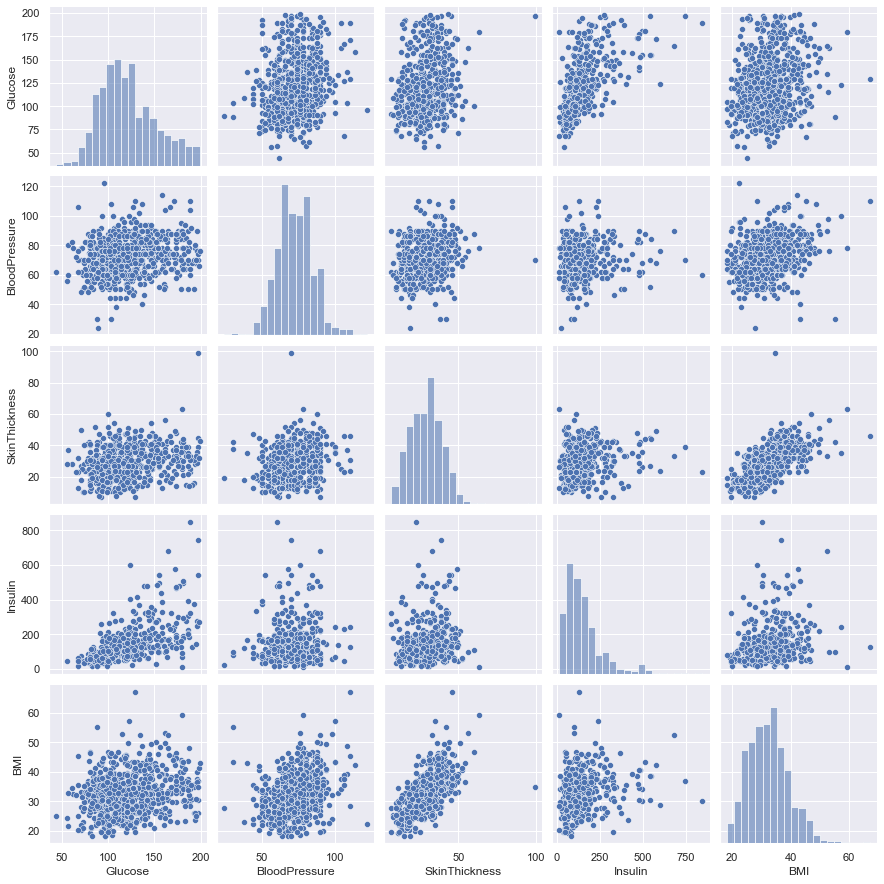

In [10]:
sns.pairplot(diabetes_data[col_list], diag_kind = "hist", diag_kws= dict(alpha=0.55, bins = 20 ))

There are a few take-aways from this visualization. The BMI and insulin level are skewed to the lower end of the distribution with small tails. There are a few outliers at very low glucose levels but the bulk of the distribution for Glucose is ~120 with a long and significant tail out to ~ 200. The BMI, Insulin, and Glucose levels are definitely not normally distributed. However, a quick look at the distribution for skin thickness and blood pressure among the sample reveal that these quantities appear to be normally distributed.


Other important takeaways from the scatter plots are: 1) BMI and skin thickness are highly correlated. Not surprisingly there is a positive correlation between insulin and glucose levels, and there is a positive correlation between blood pressure and the  BMI (also probably not too surprising). We'll compute these correlations explicity later.

#### Replace the zeros with mean and median values.

In [11]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

In [12]:
diabetes_data[col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        768 non-null    float64
 1   BloodPressure  768 non-null    float64
 2   SkinThickness  768 non-null    float64
 3   Insulin        768 non-null    float64
 4   BMI            768 non-null    float64
dtypes: float64(5)
memory usage: 30.1 KB


We've successfully removed all the NaNs.

#### Plot the correlation matrix heatmap

Correlation between various features


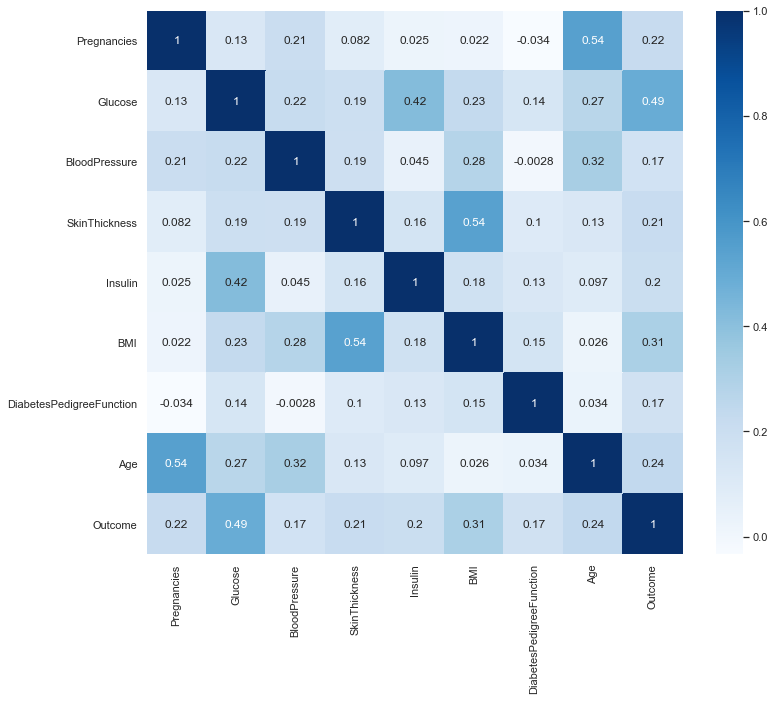

In [13]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

This pretty much corroborates what we inferred from the visualization.

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [14]:
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_data[col_list], y, test_size = 0.3, random_state = random_seed_number)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [17]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_standard,y_train)
    
    train_scores.append(knn.score(X_train_standard,y_train))
    test_scores.append(knn.score(X_test_standard,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [19]:
print('Train scores as a function of k are ' + str(list(zip(range(1,10), train_scores))) )
print('Test scores as a function of k are ' + str(list(zip(range(1,10), test_scores))) )

Train scores as a function of k are [(1, 1.0), (2, 0.839851024208566), (3, 0.8472998137802608), (4, 0.8119180633147114), (5, 0.8007448789571695), (6, 0.8026070763500931), (7, 0.813780260707635), (8, 0.8081936685288641), (9, 0.8100558659217877)]
Test scores as a function of k are [(1, 0.6753246753246753), (2, 0.658008658008658), (3, 0.696969696969697), (4, 0.7186147186147186), (5, 0.7229437229437229), (6, 0.7186147186147186), (7, 0.7445887445887446), (8, 0.7402597402597403), (9, 0.7532467532467533)]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

The max accuracy score on the training set for knn is (unsurprisingly) k = 1. 

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

The max accuracy score on the testing set is k = 9 (at least on the hyperparameters that we have iterated on). Given that the score on the testing set is still increasing we probably have not hit the actual optimal hyperparameter.

Plot the train and test model performance by number of neighbors.

C:\Users\prave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


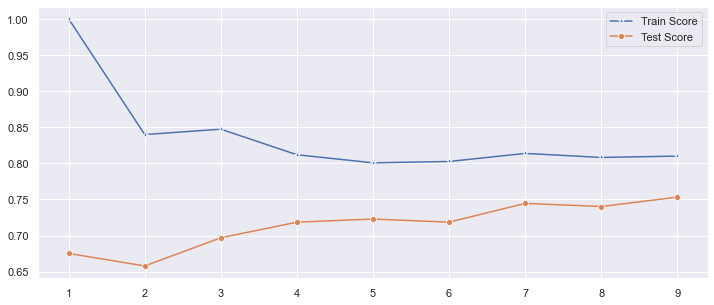

In [20]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [21]:
fitoptimal = KNeighborsClassifier(n_neighbors = 9)
fitoptimal.fit(X_train_standard, y_train)

KNeighborsClassifier(n_neighbors=9)

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test_standard)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

<AxesSubplot:>

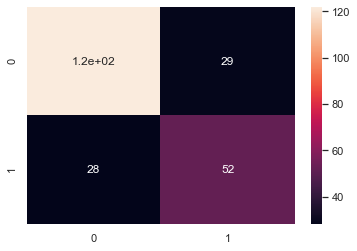

In [23]:
sns.heatmap(pl, annot = True)

**<font color='teal'> Print the classification report </font>**

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.65      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



That's ok but we probably dont have the optimal hyperparameter, so we cam probably do better.

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_standard,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [31]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7577362409138109
Best Parameters: {'n_neighbors': 10}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# dont need to standardize the data for this.
model_forest = RandomForestClassifier(criterion='entropy', random_state = random_seed_number)
params = {'n_estimators': np.arange(1,201,10)}
cv_forest = GridSearchCV(model_forest, param_grid=params, cv = 5)
cv_forest.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])})

In [46]:
cv_forest.best_params_

{'n_estimators': 81}

In [47]:
print(cv_forest.best_score_)

0.7466597438560056


In [48]:
# OK. Let's see if we can fine tune this by doing a grid parameter search between n_estimators = 71 to 91.

In [49]:
fineparams = {'n_estimators': np.arange(71,91, 2)}
cv_forest_fine = GridSearchCV(model_forest, param_grid = fineparams, cv = 5)
cv_forest_fine.fit(X_train, y_train)
print(cv_forest_fine.best_params_)

{'n_estimators': 81}


In [53]:
bestmod = cv_forest_fine.best_estimator_
bestmod.fit(X_train, y_train)
y_pred = bestmod.predict(X_test)
scores = classification_report(y_test, y_pred)

In [61]:
print(scores)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       151
           1       0.59      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



The test metrics evaluated on our hold out set show that we have nearly 80% positive identification on diabetes. The Fscore at 0.78 is fairly decent. The model performance on negative identification is substantially poorer. This is not the worst case as we would rather have our test be good at identifying positives than the other way around.

In [56]:
featimp = bestmod.feature_importances_

In [60]:
featureimp_series = pd.Series(featimp, index=col_list)
print(featureimp_series.sort_values(ascending = False))

Glucose          0.351976
BMI              0.241511
Insulin          0.146433
BloodPressure    0.142321
SkinThickness    0.117759
dtype: float64


This is a good sign. It says that the features that are most important in determining whether someone has diabetes are Glucose levels and their BMI. Seems to fit with conventional wisdom.